# Lesson - Machine Learning IV: Hyperparameters Optimization

Previously, we focused on increasing the number of attributes the model uses. We saw how, in general, adding more attributes generally lowered the error of the model. This is because the model is able to do a better job identifying the living spaces from the training set that are the most similar to the ones from the test set. However, we also observed how using all of the available features didn't actually improve the model's accuracy automatically and that some of the features were probably not relevant for similarity ranking. We saw that selecting relevant features was the right lever when improving a model's accuracy, not just increasing the features used in the absolute.

Now, we'll focus on the impact of increasing `k`, the number of nearby neighbors the model uses to make predictions. To keep results consistent, we have exported both the training (`train_df`) and test sets (`test_df`) from last exercise to CSV files, `dc_airbnb_train.csv` and `dc_airbnb_test.csv` respectively. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Setting pandas display options for large data
pd.options.display.max_rows = 200
pd.options.display.max_columns = 150

In [2]:
# Read the dataset and clean the price columns
train_df = pd.read_csv('dc_airbnb_train.csv')
test_df = pd.read_csv('dc_airbnb_test.csv')

### Hyperparameter Optimization

When we vary the features that are used in the model, we're affecting the data that the model uses. On the other hand, varying the k value affects the behavior of the model independently of the actual data that's used when making predictions. In other words, we're impacting how the model performs without trying to change the data that's used.

Values that affect the behavior and performance of a model that are unrelated to the data that's used are referred to as **hyperparameters**. The process of finding the optimal hyperparameter value is known as **hyperparameter optimization** (or tuning). A simple but common hyperparameter optimization technique is known as **grid search**, which involves:

- selecting a subset of the possible hyperparameter values,
- training a model using each of these hyperparameter values,
- evaluating each model's performance,
- selecting the hyperparameter value that resulted in the lowest error value.

Below, we will first check results for `k` varying from 1 to 5 for a model with four features: 
- accommodates
- bedrooms
- bathrooms
- number_of_reviews

**Exercise**

- Create a list containing the integer values 1, 2, 3, 4, and 5, in that order, and assign to `hyper_params`.
- Create an empty list and assign to `mse_values`.
- Use a for loop to iterate over `hyper_params` and in each iteration:
- Instantiate a `KNeighborsRegressor` object with the following parameters:
    - `n_neighbors`: the current value for the iterator variable,
    - `algorithm`: brute
- Fit the instantiated k-nearest neighbors model to the following columns from train_df:
    - `accommodates`
    - `bedrooms`
    - `bathrooms`
    - `number_of_reviews`
- Use the trained model to make predictions on the same columns from `test_df` and assign to `predictions`.
- Use the mean_squared_error function to calculate the MSE value between `predictions` and the `price column` from `test_df`.
- Append the MSE value to `mse_values`.
- Display `mse_values` using the `print()` function

In [3]:
hyper_params  =[1, 2, 3, 4, 5]
mse_values = []
rmse_values = []
features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
for param in hyper_params:
    knn = KNeighborsRegressor(n_neighbors = param, algorithm = 'brute')
    train_features = train_df[features]
    train_target = train_df['price']
    knn.fit(train_features, train_target)
    predictions = knn.predict(test_df[features])
    y_true = test_df['price']
    y_pred = predictions
    mse = mean_squared_error(y_true, y_pred)
    rmse = mse ** (1/2)
    mse_values.append(mse)
    rmse_values.append(rmse)
print(mse_values)
print(rmse_values)

[26364.92832764505, 15100.52246871445, 14578.804070281883, 15946.721060864618, 14119.735836177475]
[162.37280661380788, 122.88418315110553, 120.74271849797769, 126.28032729156438, 118.82649467260016]


### Expanding Grid Search
We will now expand grid search to k = 50 and plot the results. We will write a function to avoid repeating calculations.

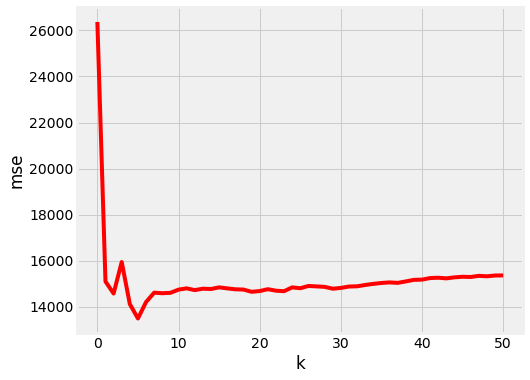

In [4]:

features = ['accommodates', 'bedrooms', 'bathrooms', 'number_of_reviews']
def knn_values (k, features = features):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    hyper_params = [r for r in range(1, k+1)]
    mse_values = []
    rmse_values = []
    for param in hyper_params:
        knn = KNeighborsRegressor(n_neighbors = param, algorithm = 'brute')
        train_features = train_df[features]
        train_target = train_df['price']
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_df[features])
        y_true = test_df['price']
        y_pred = predictions
        mse = mean_squared_error(y_true, y_pred)
        rmse = mse ** (1/2)
        mse_values.append(mse)
        rmse_values.append(rmse)
    return mse_values
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.plot(knn_values(51), color = 'red')
plt.xlabel("k")
plt.ylabel('mse')
plt.show()

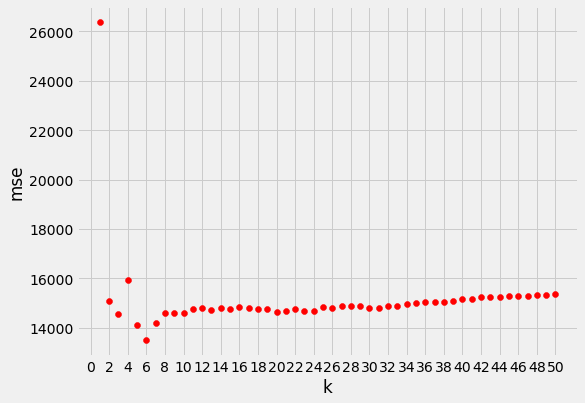

In [6]:
# Scatter Plot
k = 51
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.scatter(x=[k for k in range(1,k)], y = knn_values(k-1), color = 'red')
plt.xlabel("k")
plt.ylabel('mse')
plt.xticks(np.arange(0, k, 2))
plt.show()

### Varying Hyperparameters

From the scatter plot, we can tell that the lowest MSE value was achieved at the k value of 6. As we increased k past 6, the MSE actually increased and hovered but never decreased below 13657 (the approximate MSE value when k was 6).

We will now repeat the grid search process for the model with all features which earlier performed poorly when we fixed k to 5 and see if it would result in a lower MSE value.

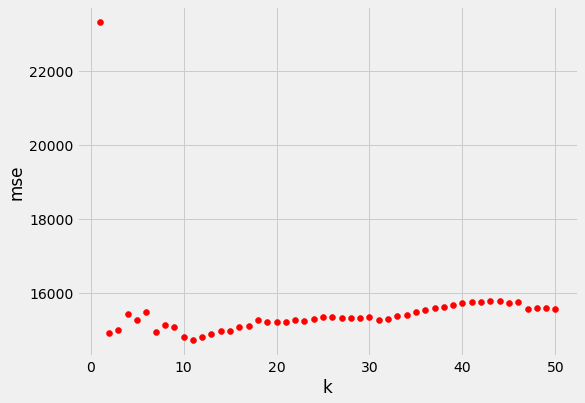

In [8]:
columns = list(train_df.columns.drop('price'))
k = 51
fig = plt.figure(figsize=(8, 6))
plt.style.use('fivethirtyeight')
plt.scatter(x=[k for k in range(1,k)], y = knn_values(k-1, features = columns), color = 'red')
plt.xlabel("k")
plt.ylabel('mse')
plt.show()

### Workflow
The general workflow for finding the best model is:

- select relevant features to use for predicting the target column.
- use grid search to find the optimal hyperparameter value for the selected features.
- evaluate the model's accuracy and repeat the process.

We will practice this work flow below starting from 2 features up to 3 features.


In [35]:
# Slightly modified the function knn_values to return a dictionary of minimum values and their k

def knn_values_min(k, features):
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.metrics import mean_squared_error
    hyper_params = [r for r in range(1, k+1)]
    mse_values = []
    min_dictionary = {}
    min_k = {}
    for param in hyper_params:
        knn = KNeighborsRegressor(n_neighbors = param, algorithm = 'brute')
        train_features = train_df[features]
        train_target = train_df['price']
        knn.fit(train_features, train_target)
        predictions = knn.predict(test_df[features])
        y_true = test_df['price']
        y_pred = predictions
        mse = mean_squared_error(y_true, y_pred)
        rmse = mse ** (1/2)
        mse_values.append(mse)
        min_dictionary[param] = mse
    min_mse_key = min(min_dictionary, key=lambda param: min_dictionary[param])
    min_k[min_mse_key] = min(mse_values) 
    return min_k



In [37]:
two_features = ['accommodates', 'bathrooms']
three_features = ['accommodates', 'bathrooms', 'bedrooms']
hyper_params = [x for x in range(1,21)]
# Append the first model's MSE values to this list.
two_mse_values = list()
# Append the second model's MSE values to this list.
three_mse_values = list()
two_hyp_mse = dict()
three_hyp_mse = dict()

two_mse_values = knn_values(20, two_features)
two_hyp_mse = knn_values_min(20, two_features)
three_mse_values = knn_values(20, three_features)
three_hyp_mse = knn_values_min(20, three_features)

print(two_hyp_mse)
print(three_hyp_mse)

{5: 14790.314266211606}
{7: 13518.769009310208}


### Conclusion

The first model, which used the `accommodates` and `bathrooms` columns, was able to achieve an MSE value of approximately 14790. The second model, which added the `bedrooms` column, was able to achieve an MSE value of approximately 13519, which is even lower than the lowest MSE value we achieved using the model with four features above which used the `accommodates`, `bedrooms`, `bathrooms`, and `number_of_reviews` columns). This demonstrates that using just one lever to find the best model isn't enough and we really have to use both levers in conjunction.
